In [1]:
import csv
import os
import time

In [2]:
import numpy as np
import pandas as pd

In [3]:
os.chdir('C:/Users/diego/OneDrive/Escritorio/Proyectos para Git/Riesgo crediticio//')
#os.chdir('../Elecciones 2021//')

In [4]:
data=pd.read_csv('hmeq.csv',encoding='ISO-8859-1')

In [5]:
met_init=data.shape
fil_init=met_init[0] 
print(fil_init) 
data.head()

5960


,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [6]:
data.drop(data[data.DEBTINC.isnull()].index,inplace=True)
data.drop(data[data.MORTDUE.isnull()].index,inplace=True)
data.drop(data[data.DEROG.isnull()].index,inplace=True)
data.drop(data[data.NINQ.isnull()].index,inplace=True)
data.drop(data[data.CLAGE.isnull()].index,inplace=True)
data.drop(data[data.JOB.isnull()].index,inplace=True)
data.drop(data[data.REASON.isnull()].index,inplace=True)
data.drop(data[data.VALUE.isnull()].index,inplace=True)
data.drop(data[data.YOJ.isnull()].index,inplace=True)
data.drop(data[data.DELINQ.isnull()].index,inplace=True)


In [7]:
met_pos=data.shape
fil_pos=met_pos[0] 

In [8]:
print('actualmente posterior al preprocesamiento del dataset cuento con el {}% del dataset'.format(round((fil_pos/fil_init),2)))

actualmente posterior al preprocesamiento del dataset cuento con el 0.56% del dataset


In [9]:
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
7,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
19,0,2300,102370.0,120953.0,HomeImp,Office,2.0,0.0,0.0,90.992533,0.0,13.0,31.588503
25,1,2400,34863.0,47471.0,HomeImp,Mgr,12.0,0.0,0.0,70.491080,1.0,21.0,38.263601
26,0,2400,98449.0,117195.0,HomeImp,Office,4.0,0.0,0.0,93.811775,0.0,13.0,29.681827


In [35]:
from sklearn import linear_model
from sklearn.metrics import r2_score
regr=linear_model.LinearRegression()

In [36]:
x=data['VALUE'].values
y=data['YOJ'].values
regr.fit(X,y)
X=x[:,np.newaxis]
m=regr.coef_[0]
b=regr.intercept_

y_aprox=m*X+b
print('la recta de regresion posee la forma es:')
print('Y=',m,'x + ',b)

la recta de regresion posee la forma es:
Y= -2.930532708718045e-06 x +  9.42532170202057


In [37]:
print('el valor del error es:',r2_score(y,y_aprox))

el valor del error es: 0.0004457428489783588


In [38]:
import matplotlib.pyplot as plt

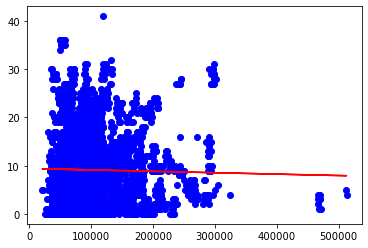

In [39]:
plt.scatter(x,y,color='blue')
plt.plot(x,y_aprox,color='red')

In [40]:
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
7,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
19,0,2300,102370.0,120953.0,HomeImp,Office,2.0,0.0,0.0,90.992533,0.0,13.0,31.588503
25,1,2400,34863.0,47471.0,HomeImp,Mgr,12.0,0.0,0.0,70.491080,1.0,21.0,38.263601
26,0,2400,98449.0,117195.0,HomeImp,Office,4.0,0.0,0.0,93.811775,0.0,13.0,29.681827


<AxesSubplot:>

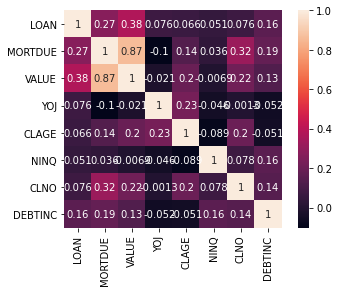

In [41]:
import numpy as np
import seaborn as sns

#definicion de la matriz
matrix = data[['LOAN','MORTDUE','VALUE','YOJ','CLAGE',\
                'NINQ','CLNO','DEBTINC']]
sns.heatmap(matrix.corr(), square=True, annot=True)



In [50]:
x=data['VALUE'].values
y=data['MORTDUE'].values
X=x[:,np.newaxis]
regr.fit(X,y)
m=regr.coef_[0]
b=regr.intercept_
y_aprox=m*X+b

In [51]:
y_aprox=m*X+b
print('la recta de regresion posee la forma es:')
print('Y=',m,'x + ',b)

la recta de regresion posee la forma es:
Y= 0.7129673299026194 x +  -395.3544489822234


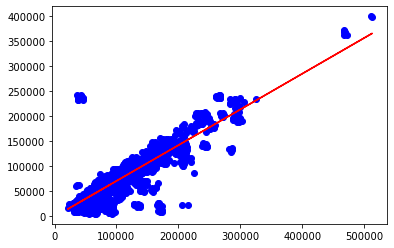

In [52]:
plt.scatter(x,y,color='blue')
plt.plot(x,y_aprox,color='red')

In [53]:
print('el valor del error es:',r2_score(y,y_aprox))

el valor del error es: 0.7486835031034336
